<a href="https://colab.research.google.com/github/PRANAY1836/USER-PROFILING-SEGMENTATION/blob/main/USER_PROFILING_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 User Profiling and Segmentation

User profiling and segmentation are powerful techniques that enable data professionals to understand their user base in-depth and tailor their strategies to meet diverse user needs. Below is the process we can follow for the task of User Profiling and Segmentation:

1. Determine what you aim to achieve with user profiling and segmentation, such as improving customer service, personalized marketing, or product recommendation.
2. Collect data from various sources, including user interactions on websites/apps, transaction histories, social media activity, and demographic information.
3. Create new features that capture relevant user behaviours and preferences. It may involve aggregating transaction data, calculating the frequency of activities, or extracting patterns from usage logs.
4. Select appropriate segmentation techniques.
5. For each segment identified, create user profiles that summarize the key characteristics and behaviours of users in that segment. User profiling is the process of creating a detailed description of someone based on their personal information, characteristics, interests, online behavior, and other relevant attributes.
6. The given dataset comprises a diverse set of user metrics collected from an online platform, consisting of 1,000 user profiles with 16 distinct features. These features include demographics (age, gender, income level, and education), online behavior (likes and reactions, followed accounts, device usage), engagement with content (time spent online during weekdays and weekends, click-through rates, conversion rates), interaction with ads (ad interaction time), and user interests.
7. Your task is to develop a robust user profiling and segmentation system that leverages machine learning and data analysis techniques to categorize users into distinct segments. By analyzing user interaction data, demographic information, and engagement metrics, identify meaningful patterns and clusters within the user base. The ultimate goal is to enable businesses to tailor their advertising campaigns to the identified segments, thereby increasing ad relevance, user engagement, and conversion rates while optimizing ad spend.

In [ ]:
#Step 1: Load and Inspect Data
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/user_profiles_for_ads.csv')

# Display basic info and first few rows
print("Shape:", df.shape)
df.head()


Shape: (1000, 16)


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [ ]:
#Step 2: Basic EDA
# Check data types and missing values
df.info()

# Count missing values per column
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

,0
User ID,0
Age,0
Gender,0
Location,0
Language,0
Education Level,0
Likes and Reactions,0
Followed Accounts,0
Device Usage,0
Time Spent Online (hrs/weekday),0


In [ ]:
#Step 3: Summary Statistics and Value Counts
# Descriptive statistics for numeric columns
df.describe()

# Value counts for categorical columns (if any)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())



Value counts for Age:
 Age
25-34    255
35-44    192
45-54    188
18-24    166
55-64    153
65+       46
Name: count, dtype: int64

Value counts for Gender:
 Gender
Female    506
Male      494
Name: count, dtype: int64

Value counts for Location:
 Location
Urban       350
Suburban    332
Rural       318
Name: count, dtype: int64

Value counts for Language:
 Language
English     258
Spanish     251
Mandarin    250
Hindi       241
Name: count, dtype: int64

Value counts for Education Level:
 Education Level
Technical      211
Master         209
High School    205
Bachelor       189
PhD            186
Name: count, dtype: int64

Value counts for Device Usage:
 Device Usage
Desktop Only        262
Mobile Only         253
Mobile + Desktop    250
Tablet              235
Name: count, dtype: int64

Value counts for Income Level:
 Income Level
100k+       176
40k-60k     175
60k-80k     168
80k-100k    168
20k-40k     165
0-20k       148
Name: count, dtype: int64

Value counts for Top Interests

In [ ]:
#Step 4: Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example: Fill missing values (can be modified based on your data)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables (if present)
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
df_scaled.head()


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,-1.730320,-0.715858,-0.988071,-0.039183,-0.438706,1.399908,0.226612,-0.433057,0.483553,1.362291,-1.432733,0.951027,0.600054,-1.290502,-0.322657,-1.328342
1,-1.726856,2.024269,1.012073,1.185278,-0.438706,0.691094,1.587521,0.870949,1.380683,-1.764920,1.529908,-0.159280,-0.202577,-0.455100,-1.511082,-1.549158
2,-1.723391,0.654206,-0.988071,-0.039183,1.337431,1.399908,-0.078279,-0.454203,0.483553,1.362291,0.492983,0.388846,1.577169,-0.221964,0.865768,-0.624809
3,-1.719927,-0.030826,-0.988071,-1.263644,1.337431,0.691094,1.475081,-0.700906,-1.310707,0.267767,-0.198299,-0.454425,0.390672,-0.513384,-0.916870,-0.362910
4,-1.716463,-0.715858,-0.988071,1.185278,-1.326775,1.399908,0.652403,0.842754,0.483553,-0.592216,-0.395809,0.698045,-0.970311,0.147167,-0.322657,-0.455345


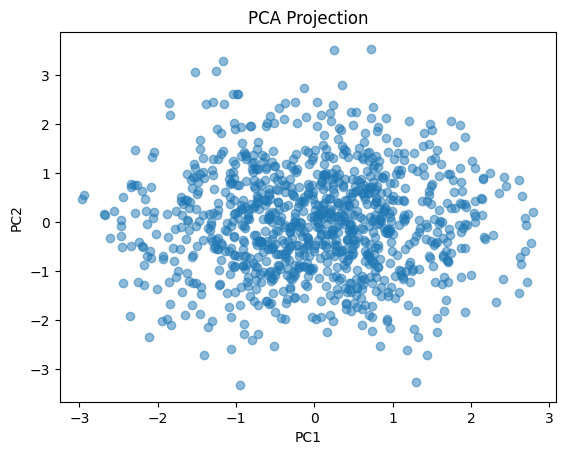

In [ ]:
# Step 5: Dimensionality Reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


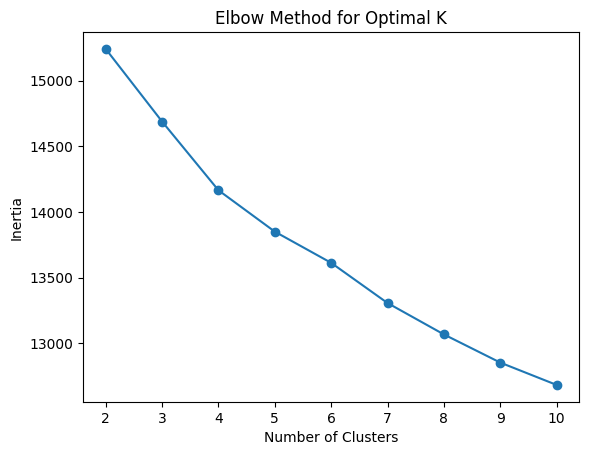

In [ ]:
# Step 6: Clustering for Segmentation (KMeans)
from sklearn.cluster import KMeans

# Find optimal number of clusters using Elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


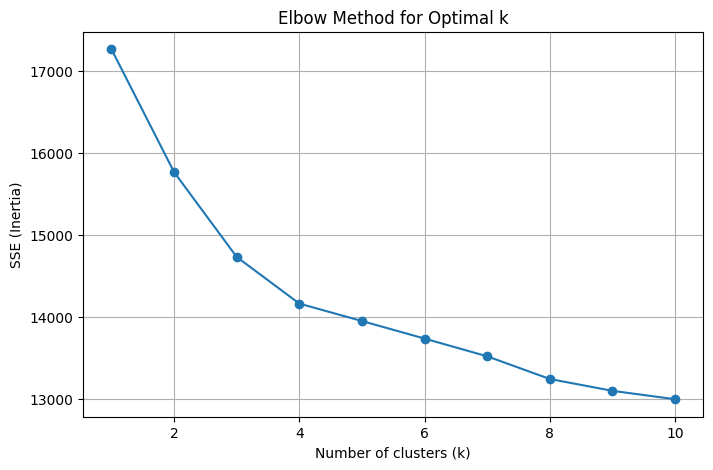

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

In [ ]:
#Step 7: Apply KMeans and Assign Segments
# Choose the best K (e.g., from elbow)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_scaled['Segment'] = kmeans.fit_predict(df_scaled)

# Add segment labels to original data
df['Segment'] = df_scaled['Segment']
df.head()


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Segment
0,1,1,0,1,1,4,5640,190,2,4.5,1.7,0.193,0.067,25,2,87,0
1,2,5,1,2,1,3,9501,375,3,0.5,7.7,0.114,0.044,68,0,44,2
2,3,3,0,1,3,4,4775,187,2,4.5,5.6,0.153,0.095,80,4,224,0
3,4,2,0,0,3,3,9182,152,0,3.1,4.2,0.093,0.061,65,1,275,3
4,5,1,0,2,0,4,6848,371,2,2.0,3.8,0.175,0.022,99,2,257,3


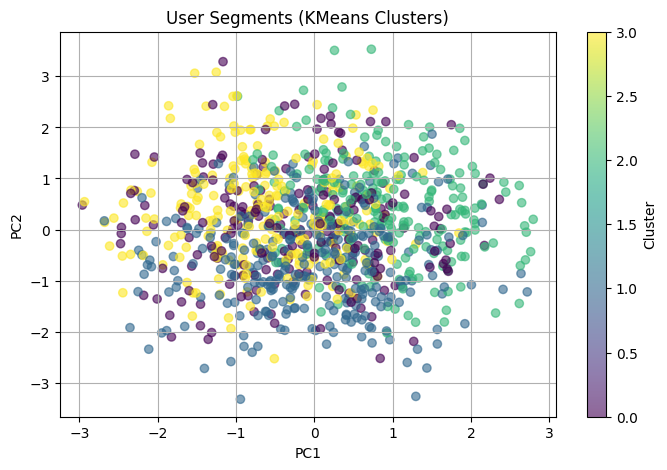

In [ ]:
optimal_k = 4  # Update based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters on PCA projection
plt.figure(figsize=(8, 5))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_scaled['cluster'], cmap='viridis', alpha=0.6)
plt.title("User Segments (KMeans Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
#Step 8: Profile Each Segment
# Average values per segment
segment_profiles = df.groupby('Segment').mean(numeric_only=True)

# Count of users in each segment
segment_counts = df['Segment'].value_counts().sort_index()

print("Segment Counts:\n", segment_counts)
segment_profiles


Segment Counts:
 Segment
0    215
1    250
2    236
3    299
Name: count, dtype: int64


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
Segment,,,,,,,,,,,,,,,,
0,466.925581,1.502326,0.097674,1.004651,1.883721,1.711628,3309.855814,224.111628,1.190698,2.922326,4.980930,0.156949,0.062363,107.860465,2.697674,277.902326
1,525.156000,1.752000,1.000000,0.600000,1.420000,2.320000,4511.404000,248.700000,1.756000,2.764400,5.543200,0.107232,0.047352,87.488000,2.612000,390.040000
2,473.483051,2.610169,0.944915,1.483051,1.546610,1.656780,5763.669492,249.639831,1.165254,2.658898,3.395339,0.141886,0.048987,89.919492,2.377119,287.313559
3,525.351171,2.234114,0.000000,1.056856,1.234114,2.294314,6011.331104,274.795987,1.642140,2.711037,4.493645,0.104669,0.043472,84.086957,2.505017,403.361204


In [ ]:
#  User Profiling per Cluster
df_with_clusters = df.copy()
df_with_clusters['cluster'] = df_scaled['cluster']

# Get average stats per cluster
cluster_profiles = df_with_clusters.groupby('cluster').mean(numeric_only=True)
print("Cluster Profile Summaries:")
print(cluster_profiles)

# Value counts for categorical features per cluster (optional)
for col in categorical_cols:
    print(f"\n{col} distribution by cluster:")
    print(df_with_clusters.groupby('cluster')[col].value_counts(normalize=True).unstack().round(2))


Cluster Profile Summaries:
            User ID       Age    Gender  Location  Language  Education Level  \
cluster                                                                        
0        466.925581  1.502326  0.097674  1.004651  1.883721         1.711628   
1        525.351171  2.234114  0.000000  1.056856  1.234114         2.294314   
2        473.483051  2.610169  0.944915  1.483051  1.546610         1.656780   
3        525.156000  1.752000  1.000000  0.600000  1.420000         2.320000   

         Likes and Reactions  Followed Accounts  Device Usage  \
cluster                                                         
0                3309.855814         224.111628      1.190698   
1                6011.331104         274.795987      1.642140   
2                5763.669492         249.639831      1.165254   
3                4511.404000         248.700000      1.756000   

         Time Spent Online (hrs/weekday)  ...  Click-Through Rates (CTR)  \
cluster                  

In [ ]:
# Step 9: Visualize Segment Characteristics
import seaborn as sns

# Pairplot to view segment separation
sns.pairplot(df_scaled.sample(300), hue='Segment', palette='tab10')


In [ ]:
print(df.columns.tolist())


['User ID', 'Age', 'Gender', 'Location', 'Language', 'Education Level', 'Likes and Reactions', 'Followed Accounts', 'Device Usage', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)', 'Income Level', 'Top Interests', 'Segment']


In [ ]:
df['Segment'] = df_scaled['Segment']


In [ ]:
# Group by segment

summary = df.groupby('Segment').agg({
    'Age': ['min', 'max', 'mean'],
    'Click-Through Rates (CTR)': 'mean',
    'Device Usage': lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A',
    'Top Interests': lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A',
    'Segment': 'count'
})

# Rename columns for clarity
summary.columns = ['Age Min', 'Age Max', 'Avg Age', 'Avg CTR', 'Top Device', 'Top Interest', 'User Count']
summary = summary.reset_index()

summary



,Segment,Age Min,Age Max,Avg Age,Avg CTR,Top Device,Top Interest,User Count
0,0,0,5,1.502326,0.156949,0,87,215
1,1,0,5,1.752000,0.107232,3,638,250
2,2,0,5,2.610169,0.141886,0,274,236
3,3,0,5,2.234114,0.104669,2,356,299


In [ ]:
print(df.columns.tolist())


['User ID', 'Age', 'Gender', 'Location', 'Language', 'Education Level', 'Likes and Reactions', 'Followed Accounts', 'Device Usage', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)', 'Income Level', 'Top Interests', 'Segment']


In [ ]:
df['Segment'] = df_scaled['Segment']


In [ ]:
# Properly grouped segment summary with correct column names
summary = df.groupby('Segment').agg({
    'Age': ['min', 'max', 'mean'],
    'Click-Through Rates (CTR)': 'mean',
    'Device Usage': lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A',
    'Top Interests': lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A',
    'Segment': 'count'
})

# Rename columns for readability
summary.columns = ['Age Min', 'Age Max', 'Avg Age', 'Avg CTR', 'Top Device', 'Top Interest', 'User Count']
summary = summary.reset_index()
summary



,Segment,Age Min,Age Max,Avg Age,Avg CTR,Top Device,Top Interest,User Count
0,0,0,5,1.502326,0.156949,0,87,215
1,1,0,5,1.752000,0.107232,3,638,250
2,2,0,5,2.610169,0.141886,0,274,236
3,3,0,5,2.234114,0.104669,2,356,299


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Drop User ID and non-numeric columns not suitable for clustering
df_clustering = df.drop(columns=['User ID', 'Location', 'Language', 'Top Interests'])

# Encode categorical columns
label_cols = ['Age', 'Gender', 'Education Level', 'Device Usage', 'Income Level']
for col in label_cols:
    df_clustering[col] = LabelEncoder().fit_transform(df_clustering[col])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
print("KMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))


KMeans Silhouette Score: 0.09526392233708757


In [ ]:
# Frequency-based feature: Engagement score
# Advanced Feature Engineering
df['Engagement_Score'] = (df['Likes and Reactions'] + df['Followed Accounts']) / \
                         (df['Time Spent Online (hrs/weekday)'] + df['Time Spent Online (hrs/weekend)'] + 1)

# Pattern-based feature: Weekend vs Weekday engagement ratio
df['Weekend_Weekday_Ratio'] = df['Time Spent Online (hrs/weekend)'] / (df['Time Spent Online (hrs/weekday)'] + 1)

# Binary encoding for high/low income
df['Income_High'] = df['Income Level'].apply(lambda x: 1 if x > df['Income Level'].median() else 0)


In [ ]:
# Segment Profiling
# Add cluster labels to the dataset (after clustering)
df['Cluster'] = kmeans.labels_

# Group and describe each segment
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = df[df['Cluster'] == cluster_id]
    print("Size:", len(cluster_data))
    print(cluster_data.describe(include='all').T[['mean', 'std', 'min', 'max']])



--- Cluster 0 ---
Size: 212
                                        mean          std         min  \
User ID                           471.099057   297.997876    1.000000   
Age                                 1.504717     1.325998    0.000000   
Gender                              0.084906     0.279401    0.000000   
Location                            1.009434     0.772701    0.000000   
Language                            1.863208     1.068801    0.000000   
Education Level                     1.716981     1.392292    0.000000   
Likes and Reactions              3323.476415  2464.776537  101.000000   
Followed Accounts                 223.099057   141.506299   13.000000   
Device Usage                        1.188679     1.085127    0.000000   
Time Spent Online (hrs/weekday)     2.914623     1.232584    0.500000   
Time Spent Online (hrs/weekend)     4.976887     2.010702    1.100000   
Click-Through Rates (CTR)           0.157929     0.062521    0.000000   
Conversion Rates      

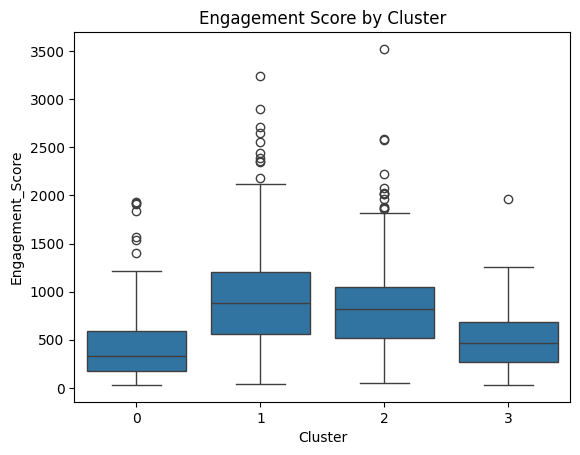

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize key variables across clusters
sns.boxplot(data=df, x='Cluster', y='Engagement_Score')
plt.title('Engagement Score by Cluster')
plt.show()


In [ ]:
# Ad Optimization Insight
# Hypothetical: Average CTR and Conversion per segment
segment_summary = df.groupby('Cluster')[['Click-Through Rates (CTR)', 'Conversion Rates']].mean()
print(segment_summary)

# Use case:
# This helps determine which segments are most responsive to ads
# → You can allocate more ad budget to high-conversion segments


         Click-Through Rates (CTR)  Conversion Rates
Cluster                                             
0                         0.157929          0.062675
1                         0.150558          0.048646
2                         0.105713          0.044023
3                         0.096416          0.047042


In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Try looser settings
dbscan = DBSCAN(eps=1.0, min_samples=3)
db_labels = dbscan.fit_predict(scaled_data)

# Check cluster label distribution
print("DBSCAN Labels:", np.unique(db_labels, return_counts=True))

# Only calculate silhouette if there are valid clusters
if len(set(db_labels)) > 1 and len(set(db_labels)) != 1 + (1 if -1 in db_labels else 0):
    score = silhouette_score(scaled_data[db_labels != -1], db_labels[db_labels != -1])
    print("DBSCAN Silhouette Score (ignoring noise):", score)
else:
    print("DBSCAN found only noise or a single cluster – adjust `eps` or `min_samples`.")


DBSCAN Labels: (array([-1]), array([1000]))
DBSCAN found only noise or a single cluster – adjust `eps` or `min_samples`.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = scaled_data
y = kmeans_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.95      0.80      0.87        71
           2       1.00      1.00      1.00        91
           3       0.82      0.94      0.88        70

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
# Assign cluster labels to the original data
df['Cluster'] = kmeans_labels

# Group and summarize
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


            User ID       Age    Gender  Location  Language  Education Level  \
Cluster                                                                        
0        471.099057  1.504717  0.084906  1.009434  1.863208         1.716981   
1        483.350000  2.491667  0.991667  1.162500  1.520833         1.604167   
2        516.841935  2.293548  0.000000  1.087097  1.254839         2.270968   
3        522.697479  1.752101  1.000000  0.848739  1.449580         2.403361   

         Likes and Reactions  Followed Accounts  Device Usage  \
Cluster                                                         
0                3323.476415         223.099057      1.188679   
1                5691.858333         259.358333      1.133333   
2                6036.441935         273.541935      1.619355   
3                4433.462185         239.903361      1.827731   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                            

In [ ]:
# Convert age groups to numeric midpoints
def age_range_to_midpoint(age_range):
    try:
        lower, upper = map(int, age_range.split('-'))
        return (lower + upper) / 2
    except:
        return None  # or handle unexpected formats

df['Age_numeric'] = df['Age'].apply(age_range_to_midpoint)


In [ ]:
features_to_scale = [
    'Age_numeric',  # use this instead of 'Age'
    'Likes and Reactions',
    'Followed Accounts',
    'Time Spent Online (hrs/weekday)',
    'Time Spent Online (hrs/weekend)',
    'Click-Through Rates (CTR)',
    'Conversion Rates',
    'Ad Interaction Time (sec)',
    'Income Level'
]


In [ ]:
def age_range_to_midpoint(age_str):
    try:
        lower, upper = map(int, age_str.split('-'))
        return (lower + upper) / 2
    except:
        return None

df['Age_numeric'] = df['Age'].apply(age_range_to_midpoint)


In [ ]:
def income_range_to_midpoint(income_str):
    try:
        # Remove 'k' and split
        parts = income_str.replace('k', '').split('-')
        lower, upper = map(int, parts)
        return ((lower + upper) / 2) * 1000
    except:
        return None

df['Income_numeric'] = df['Income Level'].apply(income_range_to_midpoint)


In [ ]:
features_to_scale = [
    'Age_numeric',
    'Likes and Reactions',
    'Followed Accounts',
    'Time Spent Online (hrs/weekday)',
    'Time Spent Online (hrs/weekend)',
    'Click-Through Rates (CTR)',
    'Conversion Rates',
    'Ad Interaction Time (sec)',
    'Income_numeric'
]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[features_to_scale])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
db_labels = dbscan.fit_predict(scaled_data)


In [ ]:
df['cluster'] = db_labels


In [ ]:
df['segment_name'] = df['cluster'].map(cluster_names)


In [ ]:
# Assign names to clusters after analyzing their characteristics
cluster_names = {
    0: "Ad Enthusiasts",
    1: "Weekend Browsers",
    2: "High Spenders",
    3: "Passive Users"
}

df['segment_name'] = df['cluster'].map(cluster_names)


In [ ]:
df['segment_name'] = df['cluster'].map(cluster_names)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Replace NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_clean = imputer.fit_transform(X)  # Still a NumPy array

# Now cluster
df['cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(X_clean)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [0 8]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Step 1: Convert X to DataFrame if it's not already
X_df = pd.DataFrame(X)

# Step 2: Drop columns that are entirely NaN
X_df = X_df.dropna(axis=1, how='all')

# Step 3: Impute remaining missing values
imputer = SimpleImputer(strategy='mean')
X_clean = imputer.fit_transform(X_df)

# Step 4: Perform clustering
df['cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(X_clean)


In [ ]:
print(df)

     User ID  Age  Gender  Location  Language  Education Level  \
0          1    1       0         1         1                4   
1          2    5       1         2         1                3   
2          3    3       0         1         3                4   
3          4    2       0         0         3                3   
4          5    1       0         2         0                4   
..       ...  ...     ...       ...       ...              ...   
995      996    0       0         0         3                0   
996      997    4       0         1         1                3   
997      998    0       1         0         1                4   
998      999    5       1         2         0                3   
999     1000    2       0         2         1                1   

     Likes and Reactions  Followed Accounts  Device Usage  \
0                   5640                190             2   
1                   9501                375             3   
2                   4775